<a href="https://colab.research.google.com/github/repoocsov/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [31]:
import numpy as np

sales_amounts = np.asarray([3505, 2400, 3027, 2798, 3700, 3250, 2689])
sales_amounts

# Calculating mean
mean = sales_amounts.sum() / sales_amounts.size
print('The mean is:', mean)

The mean is: 3052.714285714286


In [32]:
# Variance

# The sum of the deviations squared all over n - 1 (sample not population)
squared_deviations_summed = 0

for x in sales_amounts:
  # Adds the squared deviation to our summed variable
  squared_deviations_summed = squared_deviations_summed + (x - mean)**2

variance = squared_deviations_summed / (sales_amounts.size - 1)
print("The variance is:", variance)

The variance is: 214387.90476190473


In [33]:
# Standard deviation

# The square root of the variance
std = variance**(1/2)
print("The standard deviation is:", std)

The standard deviation is: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [34]:
customers_on_premise = np.asarray([127, 80, 105, 92, 120, 115, 93])
"""
sales_amounts
customers_on_premise
"""

# Using Numpy's cov() function to generate a variance-covariance matrix
np.cov(sales_amounts, customers_on_premise)

# The main diagonal are variance measures (Between self)
# The covariance between these two variables is 7604.35714286

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [35]:
"""Std of customers_on_premise"""
# Calculating the mean
mean2 = customers_on_premise.sum() / customers_on_premise.size

# First let's calculate the variance of customers_on_premise
squared_deviations_summed2 = 0

for x in customers_on_premise:
  # Adds the squared deviation to our summed variable
  squared_deviations_summed2 = squared_deviations_summed2 + (x - mean2)**2

variance2 = squared_deviations_summed2 / (customers_on_premise.size - 1)
print("The variance of customers_on_premise is:", variance2)

The variance of customers_on_premise is: 290.95238095238096


In [36]:
# Now take the square root of the variance to get the standard deviation of customers_on_premise
std2 = variance2**(1/2)
print("The std of customers_on_premise is:", std2)

The std of customers_on_premise is: 17.057326313123664


In [42]:
# Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers.
# (You may use library functions to check your work.)
"""
sales_amounts: std
customers_on_premise: std2
"""
# print(std, std2)

# r equals the covariance of our variables DIVIDED BY the standard deviations of each multiplied together
covariance_matrix = np.cov(sales_amounts, customers_on_premise)
covariance = 7604.35714286
r = 7604.35714286 / (std * std2)

print("The corellation coefficient is:", r)
print("This indicates these variables have a strong positive relationship")

The corellation coefficient is: 0.9628339778152527
This indicates these variables have a strong positive relationship


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [45]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [46]:
# Covariance matrix
covariance_matrix = df.cov()
covariance_matrix

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [47]:
# corellation matrix
corellation_matrix = df.corr()
corellation_matrix

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

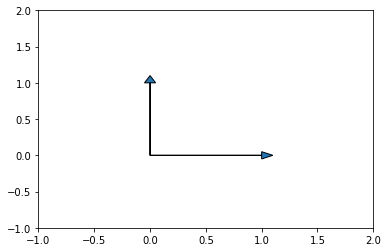

In [50]:
import matplotlib.pyplot as plt
ax = plt.axes()

vector_1 = [1, 0] # i hat
vector_2 = [0, 1] # j hat

ax.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, ec='black')
ax.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.1, ec='black')

plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.show()

# Orthogonal is a synonym for perpendicular or right angle

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [51]:
# We can check for orthogonality by checking the dot product
# A dot product of 0 means there is orthogonality
dot_product = (-5 * 6) + (3 * -8) + (2 * 7)
dot_product

# The dot product of these two vectors is not equal to 0, as a result these two vectors are not orthogonal

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [54]:
# What is the norm of c squared?
c = np.asarray([2,-15, 6, 20])
norm_of_c = ((2**2) + (-15**2) + (6**2) + (20**2))
norm_of_c

norm_of_c_squared = norm_of_c**2
norm_of_c_squared

46225

In [57]:
# What is the dot product of c and itself?
dot_product = ((2 * 2) + (-15 * 15) + (6 * 6) + (20 * 20))
dot_product

215

In [60]:
# What is the product of c transposed c
c
c_transposed = c.T
print(c_transposed)

# Because this is a a singular vector (1-D), numpy treats these vectors as equivalent even though one is row-wise and the other column-wise
# As a result the dot product is the same as above
dot_product

[  2 -15   6  20]


215

**What do these values have in common?**
It appears that the dot product of c and itself is equal to the dot product of c transposed c. Also, these two values are the square root of the norm of c squared. So the dot product of c and itself equals the norm of c.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}d = 7\hat{i} + 12 \hat{j}\end{align}

\begin{align}e = 2\hat{i} + 11 \hat{j} + -8\hat{k}\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

First calulate the norm
 \begin{align}
 ||f|| = \sqrt{4^2 + 12^2 + 11^2 + 9^2 + 2^2} 
\end{align}
\begin{align}
 ||f|| = \sqrt{366}
\end{align}
\begin{align}
 ||f|| = 19.1311
\end{align}

Now we can multiply our vector f by 1 over it's norm to get the unit vector
\begin{align}
 \hat{f} = \frac{1}{19.13}\begin{bmatrix} 4 \\ 12 \\  11 \\ 9 \\ 2 \end{bmatrix} = \begin{bmatrix} \frac{4}{19.13} \\ \frac{12}{19.13} \\  \frac{11}{19.13} \\ \frac{9}{19.13} \\ \frac{2}{19.13} \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

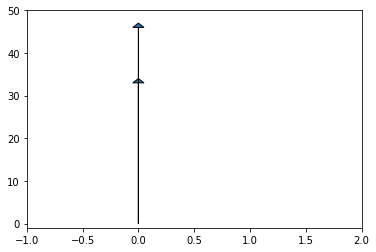

In [67]:
# Plotting two linearly dependent vectors
import matplotlib.pyplot as plt
ax = plt.axes()

vector_1 = [0, 33]
vector_2 = [0, 46]

ax.arrow(0, 0, 0, 33, head_width=.1, head_length=1, ec='black')
ax.arrow(0, 0, 0, 46, head_width=.1, head_length=1, ec='black')

plt.xlim(-1, 2)
plt.ylim(-1, 50)

plt.show()

# 1 dimensionality despite there being 2 vectors

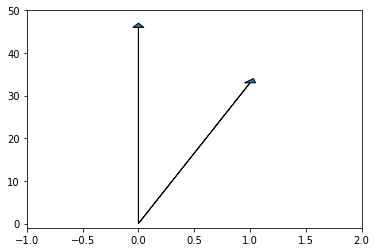

In [69]:
# Plotting two linearly independent vectors
ax = plt.axes()

vector_1 = [1, 33]
vector_2 = [0, 46]

ax.arrow(0, 0, 1, 33, head_width=.1, head_length=1, ec='black')
ax.arrow(0, 0, 0, 46, head_width=.1, head_length=1, ec='black')

plt.xlim(-1, 2)
plt.ylim(-1, 50)

plt.show()

# 2-D

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [71]:
# Span is the area of space that can be spanned by scaling the vectors (dimensionality)
# To check the span of these two vectors, we have to check to see if they are linearly dependent (redundancy)
g_and_h = np.asarray([[1,2], [4,8]])
g_and_h

# Using Gaussian elimination (row reduction)
# Multiply the first vector by -4 and add it to the second vector to 0 out the first column
# result is [0,0]
# Because only the first row has a leading 1 and the second row came out to all 0's, it shows these 2 vectors were linearly dependent
# as a result, the span of the following vectors is 1 (rank of the matrix was 1)

array([[1, 2],
       [4, 8]])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [74]:
lmn = np.asarray([[1,2,3], [-1,0,7],[4,8,2]])
lmn[1] = [0, 2, 10]
lmn[2] = [0, 0, -10]
lmn

array([[  1,   2,   3],
       [  0,   2,  10],
       [  0,   0, -10]])

In [75]:
lmn[1] = [0,1,5]
lmn

array([[  1,   2,   3],
       [  0,   1,   5],
       [  0,   0, -10]])

In [76]:
lmn[2] = [0,0,1]
lmn

# The span is all of 3 dimensional space, as these three vectors are all linearly dependent. (The rank of this matrix is 3)

array([[1, 2, 3],
       [0, 1, 5],
       [0, 0, 2]])

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



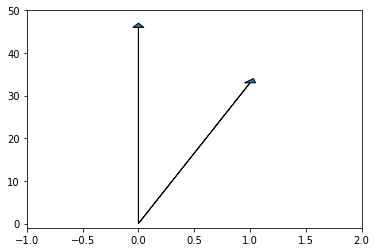

In [77]:
# Basis R2 means that the number of dimensions a set of vectors covered given scaling is the entire two dimensional plane.
# Basically, the two vectors have to be linearly independent as opposed to linearly dependent.
# If the two vectors were to be linearly dependent, then the basis they would form would be R1 as opposed to R2.

ax = plt.axes()

vector_1 = [1, 33]
vector_2 = [0, 46]

ax.arrow(0, 0, 1, 33, head_width=.1, head_length=1, ec='black')
ax.arrow(0, 0, 0, 46, head_width=.1, head_length=1, ec='black')

plt.xlim(-1, 2)
plt.ylim(-1, 50)

plt.show()

## 6.2 What does it mean to form a basis?

The basis of a vector space V is a set of vectors that are linearly independent. Vectors form a basis when all linear dependent vectors are removed. In other terms, the bare minimum number of vectors to cover a degree of space (R1, R2, R3, etc. basis').

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [78]:
P = np.asarray([[1,2,3],[-1,0,7],[4,8,2]])

# After Gaussian elimination the array comes out to
p_post = np.asarray([[1, 2, 3],
       [0, 1, 5],
       [0, 0, 1]])
p_post

# Rank is the number of linear independent vectors in a matrix.
# Because we applied row reduction to our matrix, we can see the number of leading 1's
# The number of leading 1's is 3.
# The rank of the P matrix is 3

array([[1, 2, 3],
       [0, 1, 5],
       [0, 0, 2]])

## 7.2 What does the rank of a matrix tell us?

It is a number that represents the number of linear independent vectors in a matrix. The rank of a matrix is similar to the span and basis in that it indicates the degrees of space the matrix covers.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# 8.1 IS A STRETCH GOAL

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

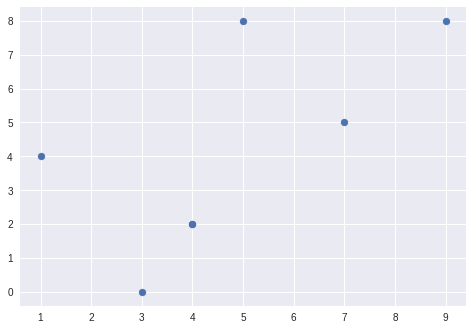

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()